In [4]:
import numpy as np
import os

from standard_tester import *

from runlmc.models.lmc import LMC
from runlmc.kern.rbf import RBF
from runlmc.models.optimization import AdaDelta
from runlmc.models.gpy_lmc import GPyLMC

%matplotlib inline 
import matplotlib.pyplot as plt

In [5]:
np.random.seed(1234)
ks = [RBF(name='rbf0')]
ranks = [2]
# all_ixs is union of all xss, holdout, holdin are dictionaries of slices
xss, yss, test_xss, test_yss = foreign_exchange_mixed_holdout()
pred_xss = test_xss
cache_dir = '/tmp/'
inducing_points = [3]#np.arange(10, 150, 10)
num_runs = 1# 5

In [6]:
sum(map(len, xss)), sum(map(len, test_xss)) # train,test size

(1608, 1596)

In [8]:
file_cached_vars = ['runlmc_times', 'runlmc_smses', 'runlmc_nlpds']
if all(os.path.isfile(cache_dir + file) for file in file_cached_vars):
    runlmc_times, runlmc_smses, runlmc_nlpds = [
        list(np.loadtxt(cache_dir + i)) for i in file_cached_vars]
else:
    runlmc_times, runlmc_smses, runlmc_nlpds = [], [], []
    for m in inducing_points:
        time, smse, nlpd, _ = runlmc(
            num_runs, m,
            xss, yss, test_xss, test_yss,
            ks, ranks, {'max_it': np.inf, 'verbosity':0})
        print('m', m, 'time', time, 'smse', smse, 'nlpd', nlpd)
        runlmc_times.append(time)
        runlmc_smses.append(smse)
        runlmc_nlpds.append(nlpd)
    for i in file_cached_vars:
        np.savetxt(cache_dir + i, eval(i))

m 3 time 2.164733828 smse 0.361861349192 nlpd -2.32774814488


In [4]:
cogp_file_cached_vars = ['cogp_times', 'cogp_smses', 'cogp_nlpds']
if all(os.path.isfile(cache_dir + file) for file in cogp_file_cached_vars):
    cogp_times, cogp_smses, cogp_nlpds = [
        list(np.loadtxt(cache_dir + i)) for i in cogp_file_cached_vars]
else:
    cogp_num_runs = 2
    cogp_times, cogp_smses, cogp_nlpds = [], [], []
    for m in inducing_points:
        time, smse, nlpd = cogp_fx2007(cogp_num_runs, m)
        print('m', m, 'time', time, 'smse', smse, 'nlpd', nlpd)
        cogp_times.append(time)
        cogp_smses.append(smse)
        cogp_nlpds.append(nlpd)
    for i in cogp_file_cached_vars:
        np.savetxt(cache_dir + i, eval(i))        

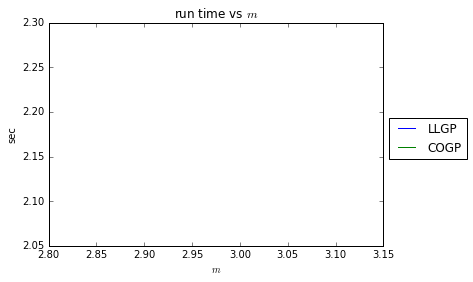

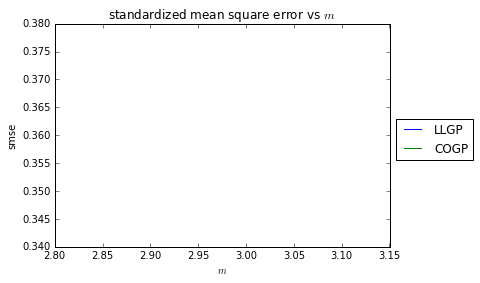

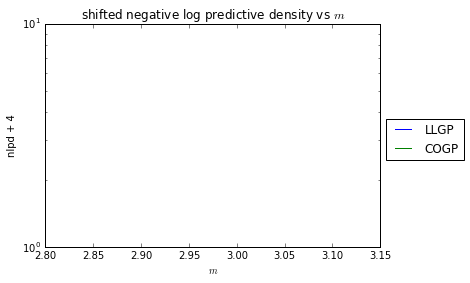

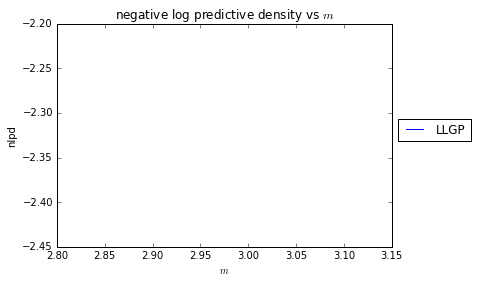

In [11]:
#also runlmc_nlpds, cogp_nlpds
plt.plot(inducing_points, runlmc_times, label='LLGP')
plt.plot(inducing_points, cogp_times, label='COGP')
plt.legend(bbox_to_anchor=(1, 0.6), loc=2)
plt.title(r'run time vs $m$')
plt.xlabel(r'$m$')
plt.ylabel('sec')
plt.show()
plt.plot(inducing_points, runlmc_smses, label='LLGP')
plt.plot(inducing_points, cogp_smses, label='COGP')
plt.legend(bbox_to_anchor=(1, 0.6), loc=2)
plt.title(r'standardized mean square error vs $m$')
plt.xlabel(r'$m$')
plt.ylabel('smse')
plt.show()
shift = min(min(runlmc_nlpds), min(cogp_nlpds))
assert shift < 0
shift = int(abs(shift) * 2)
plt.semilogy(inducing_points, np.array(runlmc_nlpds) + shift, label='LLGP')
plt.semilogy(inducing_points, np.array(cogp_nlpds) + shift, label='COGP')
plt.legend(bbox_to_anchor=(1, 0.6), loc=2)
plt.title(r'shifted negative log predictive density vs $m$')
plt.xlabel(r'$m$')
plt.ylabel('nlpd + {}'.format(shift))
plt.show()
plt.plot(inducing_points, np.array(runlmc_nlpds), label='LLGP')
plt.legend(bbox_to_anchor=(1, 0.6), loc=2)
plt.title(r'negative log predictive density vs $m$')
plt.xlabel(r'$m$')
plt.ylabel('nlpd')
plt.show()